# Table of Contents
 <p><div class="lev1"><a href="#Single-loop"><span class="toc-item-num">1&nbsp;&nbsp;</span>Single loop</a></div><div class="lev1"><a href="#Many-LEFs"><span class="toc-item-num">2&nbsp;&nbsp;</span>Many LEFs</a></div><div class="lev1"><a href="#Statistics-of-loop-arrays."><span class="toc-item-num">3&nbsp;&nbsp;</span>Statistics of loop arrays.</a></div>

In [1]:
import sys

import numpy as np

from mirnylib import h5dict
sys.path.append('/net/dna/home/golobor/programming/looplib/')
import pyximport; pyximport.install(
    setup_args={"include_dirs":np.get_include()},
    reload_support=True)
from looplib import loopviz, looptools, simlef_onesided, simlef
import os, sys, glob, shelve, time


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from importlib import reload
reload(loopviz)

import seaborn as sns
sns.set_style('white')

# Single loop

In [14]:
p = {}
p['L'] = 100
p['N'] = 1
p['R_OFF'] = 1.0 / 100
p['R_EXTEND'] = float(1.0)
p['R_SHRINK'] = 0#float(.4)
p['R_SWITCH'] =  0.03

p['T_MAX_LIFETIMES'] = 3.0
p['T_MAX'] = p['T_MAX_LIFETIMES'] / p['R_OFF']
p['N_SNAPSHOTS'] = 300
p['PROCESS_NAME'] = b'proc'

l_sites, r_sites, leading_legs, ts = simlef_onesided.simulate(p)
#l_sites, r_sites, ts = simlef.simulate(p)


b'proc' 10 14.642739604885374 300.0
b'proc' 20 27.56276291057275 300.0
b'proc' 30 43.293576817551916 300.0
b'proc' 40 66.33360746945688 300.0
b'proc' 50 84.01199324090437 300.0
b'proc' 60 103.0867276359569 300.0
b'proc' 70 152.99498912476645 300.0
b'proc' 80 167.6544351943419 300.0
b'proc' 90 185.7397027571857 300.0
b'proc' 100 206.83986877815926 300.0
b'proc' 110 226.58930081632883 300.0
b'proc' 120 250.56096352538094 300.0
b'proc' 130 271.293318181751 300.0
b'proc' 140 294.230035615398 300.0
b'proc' 150 312.5642071629657 300.0
b'proc' 160 328.35183201952566 300.0
b'proc' 170 346.4154271612119 300.0
b'proc' 180 363.10884920151824 300.0
b'proc' 190 381.1303423266504 300.0
b'proc' 200 398.9508251783611 300.0
b'proc' 210 414.03115531969263 300.0
b'proc' 220 437.29556031267106 300.0
b'proc' 230 500.26784306497115 300.0
b'proc' 240 748.6898663723435 300.0
b'proc' 250 771.0091829183411 300.0
b'proc' 260 789.1420068929662 300.0
b'proc' 270 806.5105410897884 300.0
b'proc' 280 824.087732897865

(0, 100)

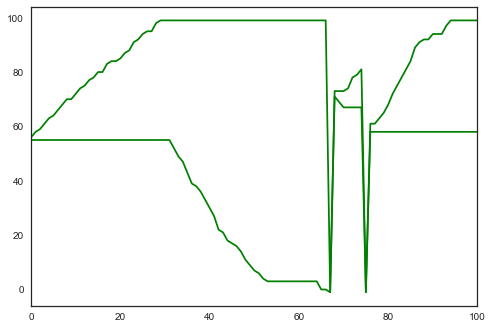

In [15]:
n=0
plt.plot(
    l_sites[:,n], c='g')
plt.plot(
    r_sites[:,n], c='g')

plt.xlim(0,100)

# Many LEFs

In [16]:
p = {}
p['L'] = 20000
p['N'] = 300
p['R_OFF'] = 1.0 / 1000.0
p['R_EXTEND'] = float(2.0)
p['R_SHRINK'] = float(0.1)

p['R_SWITCH'] = p['R_OFF'] * 10

p['T_MAX_LIFETIMES'] = 100.0
p['T_MAX'] = p['T_MAX_LIFETIMES'] / p['R_OFF']
p['N_SNAPSHOTS'] = 200
p['PROCESS_NAME'] = b'proc'

l_sites, r_sites, leading_legs, ts = simlef_onesided.simulate(p)
#l_sites, r_sites, ts = simlef.simulate(p)


b'proc' 10 5000.02039556522 100000.0
b'proc' 20 10000.045713543162 100000.0
b'proc' 30 15000.05436592403 100000.0
b'proc' 40 20000.074574626113 100000.0
b'proc' 50 25000.088048352496 100000.0
b'proc' 60 30000.098901768775 100000.0
b'proc' 70 35000.12759556367 100000.0
b'proc' 80 40000.13682525989 100000.0
b'proc' 90 45000.15822979453 100000.0
b'proc' 100 50000.17638494497 100000.0
b'proc' 110 55000.19249545357 100000.0
b'proc' 120 60000.20953944753 100000.0
b'proc' 130 65000.234448201205 100000.0
b'proc' 140 70000.25813769284 100000.0
b'proc' 150 75000.2737971825 100000.0
b'proc' 160 80000.28702594686 100000.0
b'proc' 170 85000.30065401133 100000.0
b'proc' 180 90000.32027761583 100000.0
b'proc' 190 95000.33528547676 100000.0
b'proc' 200 100000.34334901722 100000.0


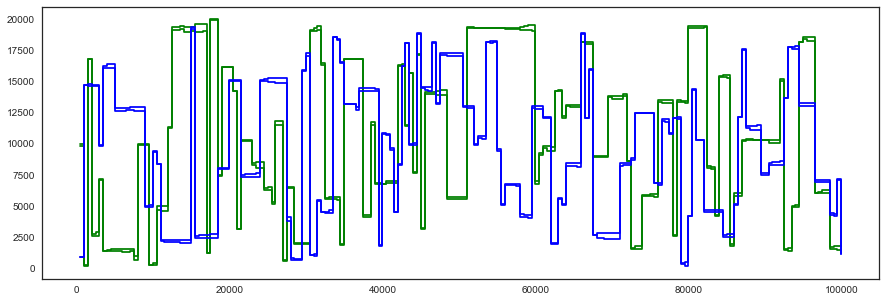

In [18]:
plt.figure(figsize=(15,5))
n=0
plt.step(
    ts,
    l_sites[:,n], c='g',where='post',)
plt.step(
    ts,
    r_sites[:,n], c='g',where='post',)


n=1
plt.step(
    ts,
    l_sites[:,n], c='b',
    where='post',)
plt.step(
    ts,
    r_sites[:,n], c='b',
    where='post',)


#plt.figure()
#plt.plot(leading_legs)

#plt.xlim(0,5000000)

# Statistics of loop arrays.

In [19]:
import collections

def get_n_leafs(idx, children):
    if isinstance(idx, collections.Iterable):
        return np.array([get_n_leafs(i, children) for i in idx])
    else:
        if len(children[idx])==0:
            return 1
        else:
            return sum([get_n_leafs(child, children) 
                        for child in children[idx]])


In [23]:
t=-1
parents = looptools.get_parent_loops(
            l_sites[t], 
            r_sites[t])
root_loops_idxs = np.where(parents == -1)[0]
children = looptools.get_loop_branches(parents)

(array([ 16.,   8.,  15.,   6.,  10.,  10.,  12.,   4.,   6.,   5.,   4.,
          4.,   1.,   2.,   2.,   0.,   0.,   0.,   0.,   2.]),
 array([   1. ,   33.5,   66. ,   98.5,  131. ,  163.5,  196. ,  228.5,
         261. ,  293.5,  326. ,  358.5,  391. ,  423.5,  456. ,  488.5,
         521. ,  553.5,  586. ,  618.5,  651. ]),
 <a list of 20 Patch objects>)

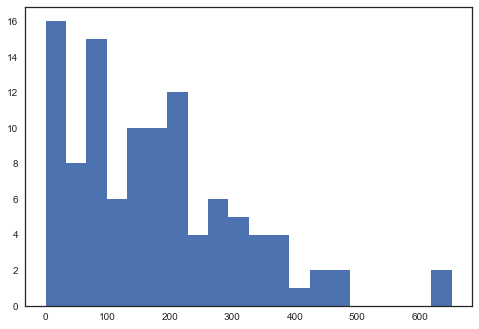

In [26]:
plt.hist(
    r_sites[t][root_loops_idxs] - l_sites[t][root_loops_idxs],
    bins=20)

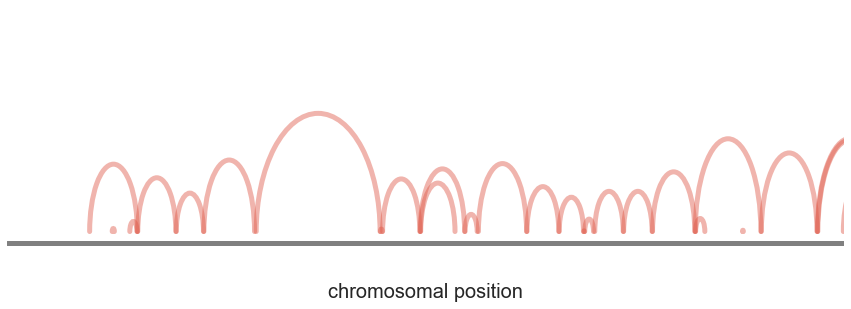

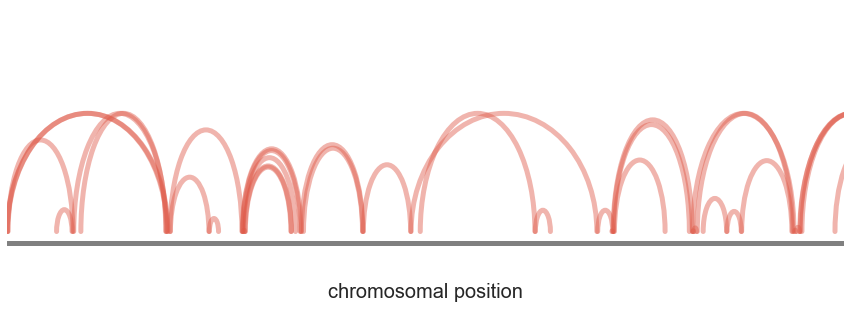

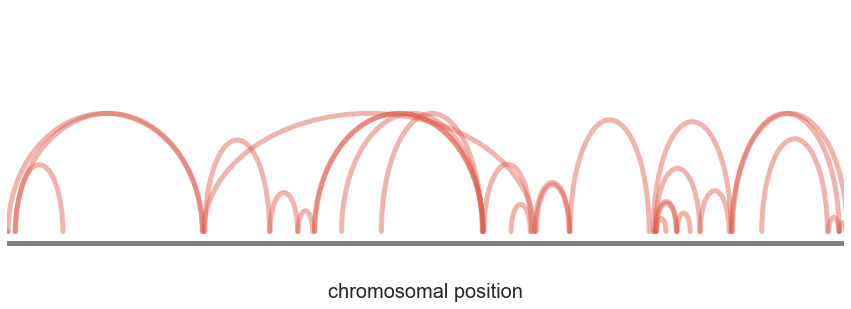

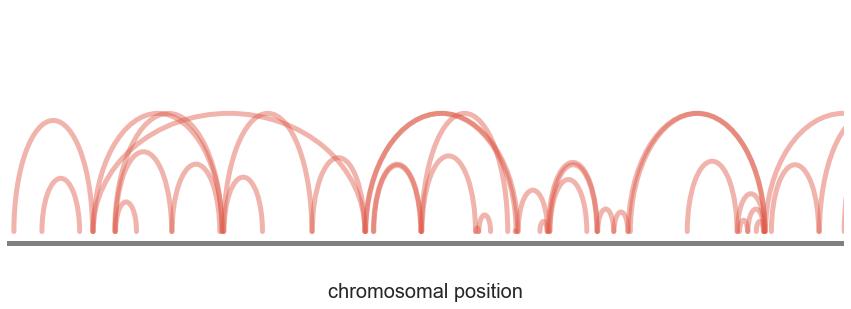

In [30]:
ts4plot = [0, 5, -20, -1]
for t in ts4plot:    
    loopviz.plot_lefs(
        l_sites=l_sites[t], 
        r_sites=r_sites[t], 
        L=p['L'],
        colors=[(223.0/255.0,90/255.0,73/255.0)] *500,
        site_width_bp = 600,
        max_height=200,
        plot_text=False,
        height_factor=2.0)
    plt.xlim(0,p['L']//10)
    plt.xticks([])
    plt.xlabel('chromosomal position')
    #plt.savefig('/net/rosetta/home/golobor/Dropbox (MIT)/work/2012/1016-SMC/doc/arcs{}.svg'.format(t))

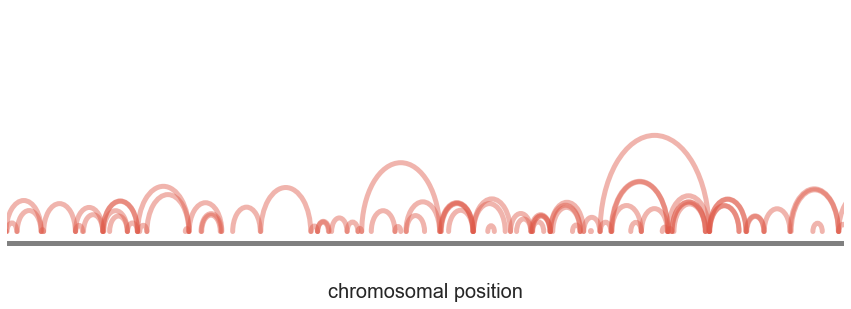

In [31]:
loopviz.plot_lefs(
    l_sites=l_sites[-1,:], 
    r_sites=r_sites[-1,:], 
    L=50000,
    colors=[(223.0/255.0,90/255.0,73/255.0)] *500,
    site_width_bp = 600,
    max_height=200,
    plot_text=False,
    height_factor=0.5)
plt.xlim(10000,15000)
plt.xticks([])
plt.xlabel('chromosomal position')

In [11]:




avg_lens = []
roffs = np.array([1/1000.0, 1/300.0, 1/100.0, 1/10.0])
for roff in roffs:
    p = {}
    p['R_EXTEND'] = float(1.0)
    p['R_SHRINK'] = 0.0
    p['R_OFF'] = roff
    p['L'] = 1000000
    p['N'] = 100
    p['T_MAX_LIFETIMES'] = 20.0
    p['T_MAX'] = p['T_MAX_LIFETIMES'] / p['R_OFF']
    p['N_SNAPSHOTS'] = 20
    p['PROCESS_NAME'] = 'proc'

    l_sites, r_sites, ts = lem1d.simulate(p)
    avg_lens.append((r_sites-l_sites).mean())

NameError: name 'lem1d' is not defined